# 2장. 컴퓨터 비전 소개

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch02/02-fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

## 의류 아이템 인식하기

In [1]:
import tensorflow as tf

# Fashion MNIST 데이터 로드

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

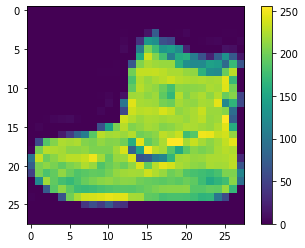

In [2]:
import matplotlib.pyplot as plt

# 이미지 샘플 모습 확인하기 28 x 28 x 1 (Grey: 0~255)

plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)

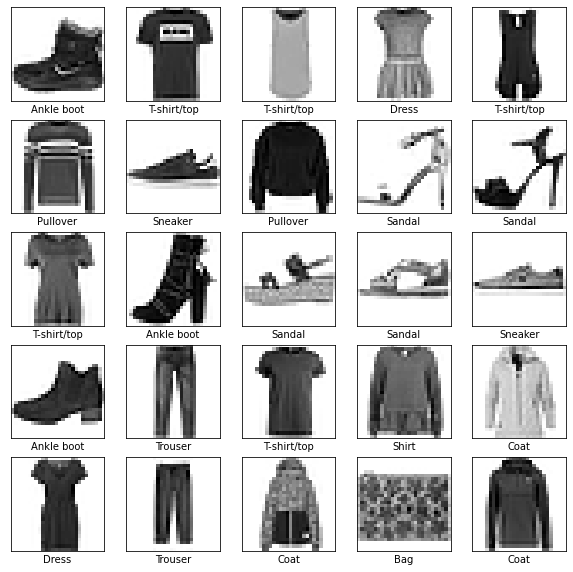

In [3]:
# 10개의 클래스 명칭 지정

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 각 클래스별 샘플 이미지 확인

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])

In [4]:
# 학습용 6만개, 테스트용 1만개, 이미지 사이트 28x28

print ('Training data:', training_images.shape, training_labels.shape)
print ('Test data:', test_images.shape, test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [5]:
from sklearn.model_selection import train_test_split

# validation data 분리 구성

training_images, validation_images, training_labels, validation_labels = train_test_split(training_images, training_labels, test_size=0.1, random_state=42)

In [6]:
# 데이터 정규화 (Data Normalization)

training_images  = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=5)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5075 - accuracy: 0.8214 - val_loss: 0.4168 - val_accuracy: 0.8503
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.8619 - val_loss: 0.3614 - val_accuracy: 0.8672
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3411 - accuracy: 0.8744 - val_loss: 0.3702 - val_accuracy: 0.8652
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3150 - accuracy: 0.8830 - val_loss: 0.3316 - val_accuracy: 0.8813
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8916 - val_loss: 0.3305 - val_accuracy: 0.8820


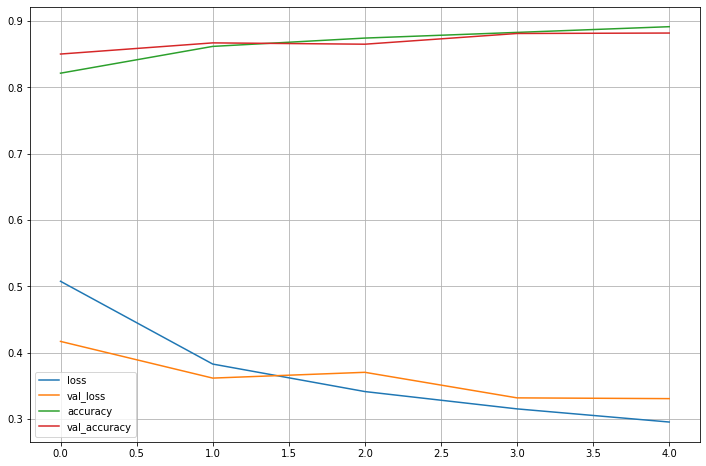

In [11]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8682


[0.35829776525497437, 0.8682000041007996]

## 모델 출력 살펴보기

In [13]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[5.2449928e-07 1.0514433e-09 1.1886370e-07 3.6326296e-07 2.8329120e-07
 1.0530044e-02 2.9820230e-06 2.3583880e-02 2.0863996e-05 9.6586096e-01]
9


In [14]:
import numpy as np

np.argmax(classifications[0])

9

## 더 오래 훈련하기 - 과대적합 (Over-Fitting)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Epochs = 50 학습

hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=50)

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5029 - accuracy: 0.8212 - val_loss: 0.4161 - val_accuracy: 0.8498
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3800 - accuracy: 0.8628 - val_loss: 0.3606 - val_accuracy: 0.8713
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3400 - accuracy: 0.8763 - val_loss: 0.3722 - val_accuracy: 0.8680
Epoch 4/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3157 - accuracy: 0.8841 - val_loss: 0.3453 - val_accuracy: 0.8728
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3309 - val_accuracy: 0.8775
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8951 - val_loss: 0.3189 - val_accuracy: 0.8833
Epoch 7/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2667 - accuracy: 0.9009 - val_loss: 0.3248 - val_accuracy:

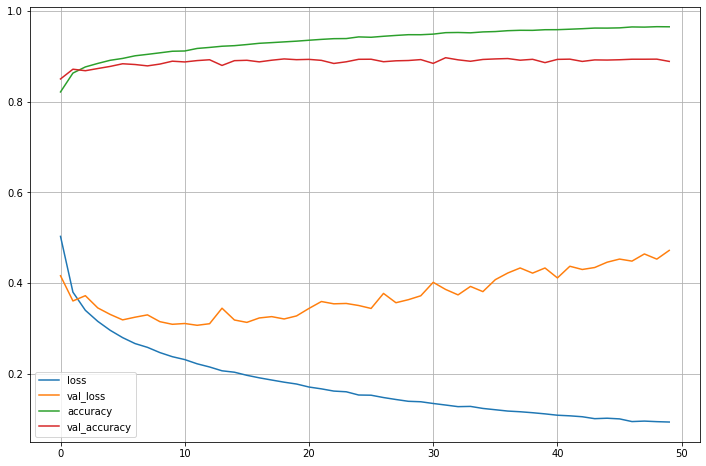

In [16]:
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.8843


[0.5267783403396606, 0.8842999935150146]

## 훈련 조기 종료

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\n정확도 95%에 도달하여 훈련을 멈춥니다!")
            self.model.stop_training = True

In [19]:
callbacks = myCallback()

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

# model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])
hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=50, callbacks=[callbacks])

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.8204 - val_loss: 0.4191 - val_accuracy: 0.8463
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8615 - val_loss: 0.3751 - val_accuracy: 0.8643
Epoch 3/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8760 - val_loss: 0.3938 - val_accuracy: 0.8622
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3159 - accuracy: 0.8845 - val_loss: 0.3425 - val_accuracy: 0.8793
Epoch 5/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2995 - accuracy: 0.8886 - val_loss: 0.3217 - val_accuracy: 0.8842
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.8946 - val_loss: 0.3257 - val_accuracy: 0.8857
Epoch 7/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2689 - accuracy: 0.8998 - val_loss: 0.3296 - val_accuracy:

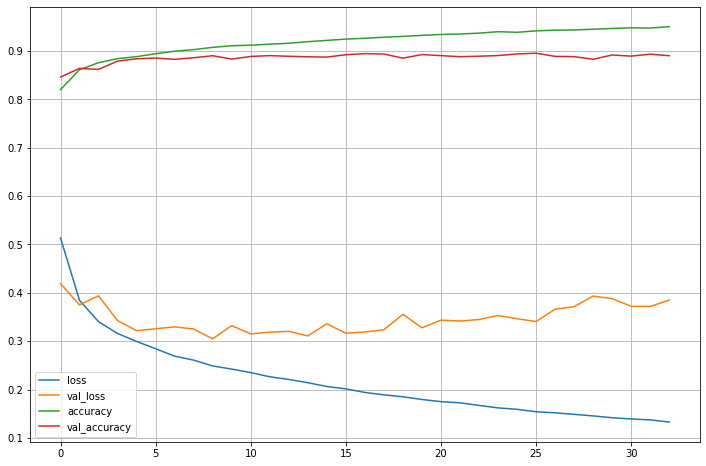

In [21]:
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()